Let's Grow More - Data Science Intern

LGMVIP November 2023

Beginner Level Task

Task 3 : Music Recommendation

Saachi Bhimanpalli

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
ntr = 7000
nts = 3000
train = pd.read_csv('train.csv',nrows=ntr)
names=['msno','song_id','source_system_tab','source_screen_name','source_type','target']
test1 = pd.read_csv('train.csv',names=names,skiprows=ntr,nrows=nts)
songs = pd.read_csv('songs.csv')
members = pd.read_csv('members.csv')

In [127]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [128]:
train.sample(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
4199,uKg9h4w3vN3A473AXKNVS4lP9LoxdQmE6aPlcdmtDEc=,sNQnU3gLopW6AAQokBXdNTGGhIWDBihdw5ax4h5DtLQ=,my library,Local playlist more,local-library,1
2795,TrFaCWRYOEqUzCdAM+Xo4lENP/fT5874l472M5cDSLQ=,Ce8Mui+yVruumWy9pKMDfSRBFg1m93m/+XR8FHlktaE=,my library,Local playlist more,local-library,1
6538,aljEQHA7xSyPJhXgJTHKHt907xPO6oFNE4u+GwpyTNI=,3VkD5ekIf5duJm1hmYTZlXjyl0zqV8wCzuAh3uocfCg=,discover,Online playlist more,online-playlist,1
5956,6vDnqArot3MS62T5xyl6bk1wGqZR3mhG9OLGN6heCWo=,myb90iMFSrnqrAJrEdLrQnfU2utUybt09gs1gc5DUAM=,search,Album more,album,0
451,YUp+WdysLxN/tub5lQ3wHIjDdrgK0eNtlJE6+c/fk2g=,hpGpQSdhVi3+st7q+ZbIhHTlerJ6hHGfh1wc8R8cDAA=,my library,Local playlist more,local-library,1
501,GhOMFq0TtoXFD8BXShUHSCRtt/ZRrBYd9ASvbpMS5D8=,xsj0yMjUC4pvW9RNySQ6Ugd+r3JDho/f28596nODfm0=,my library,Local playlist more,local-library,1
3525,SUSeezrK1JzTiaRIxI570Fts2VW9sYB+kpl1B+f6jZQ=,pfQN+DyMX1X2gi+hURJOLKgwaHYlIbGVnTnTuKn4ExI=,my library,Local playlist more,local-library,1
5995,BWQrudLbbAc0nPVw+x31To2jVmF0iGPNeOt0+v0lpzc=,C9+87S3Nvh5V+Y9jYvaKIspw9RzEyi+KuqmuQwtbhKI=,listen with,Others profile more,listen-with,1
5759,nX9YAK14esuJyM2jM22A68QFIkLsOK+JABNr5wHqTxw=,aeYERCAEVMvcpFG2OXyqRqHCm+S1yWIPfdRPOTM5V14=,my library,Local playlist more,local-library,1
4354,Gxdtmil1Obi8//Fcl8Lh7FZvEjeNJ570V6pWfRiCbHY=,cQI8Uzy06tt/XJ59vDlifTQTl2qOiTFBkf5yVCUNoyg=,search,Online playlist more,online-playlist,0


In [129]:
train.shape

(7000, 6)

In [130]:
train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [131]:
train.describe()

,target
count,7000.000000
mean,0.783429
std,0.411937
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [132]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   msno                7000 non-null   object
 1   song_id             7000 non-null   object
 2   source_system_tab   6986 non-null   object
 3   source_screen_name  6815 non-null   object
 4   source_type         6986 non-null   object
 5   target              7000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 328.2+ KB


In [133]:
train.isnull().sum()

msno                    0
song_id                 0
source_system_tab      14
source_screen_name    185
source_type            14
target                  0
dtype: int64

In [134]:
test1.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,gpioqmDgSWfpkkCSQts5GMAGaM1TFH5zpVawYOjxIog=,my library,Local playlist more,local-library,1
1,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,CQ8ouYUSxeEMbNaql4pAL35CqqJKgd0Ms7tH3DmHOJ8=,my library,Local playlist more,local-library,1
2,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,NA/ZT/ard6XUWrnCvqbEnQLiXnYyP2m4Zq3jWvjLCPY=,my library,Local playlist more,local-library,1
3,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,wloUHWvwV3EYBJsb0hUG1tIeRlgkrf8QzkootXtY/v0=,search,Online playlist more,online-playlist,0
4,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,UZ75pCG2butQs9dVI1s4tedeDZGRwQ551HGdRsVm29Y=,search,Online playlist more,online-playlist,0


In [135]:
songs.head(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640.0,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328.0,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781.0,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554.0,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329.0,726,貴族精選,Traditional,Traditional,52.0
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520.0,864|857|850|843,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220.0,458,伍佰 & China Blue,Jonathan Lee,NaN,3.0
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793.0,465,光良 (Michael Wong),光良,彭資閔,3.0
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623.0,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629.0,352|1995,Kodaline,Stephen Garrigan| Mark Prendergast| Vincent Ma...,Stephen Garrigan| Mark Prendergast| Vincent Ma...,52.0


In [136]:
songs.sample(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
1362072,fQ3GwqjL/Jo2l9etD3Du2FCOcCH8+fEpf/rhBB7TjyM=,334140.0,465,Luis Eduardo Aute,Luis Eduardo Aute,Luis Eduardo Aute,52.0
1283213,m4WFb3YZOgVdjkEPj6VgRK2VpFwp7myYr0J3bYd2TkU=,226626.0,947,Water Sounds,NaN,NaN,-1.0
309816,yC53RlKhFCwU2POlBf2QsWKwHLUH7asZJFBRFhU+AvI=,256000.0,786|958,Yung-Jen Chen,Edvard Grieg,NaN,-1.0
1030822,R5zvrHCZKMClISaf8+T9TC6XVd5FCtUj2Pmexlaa2Ng=,155480.0,465,燕雙雙,佚名,NaN,59.0
272523,LTSsayKnjRT2VdkRKxz1fx2Zii5sdEQQDXdoNiLDc94=,290899.0,465,謝莉婷,許明傑,高以德,10.0
1508824,rZGWkWYLt32CuahQDypUcB9LUlJDbGmWMTKt4RT757U=,194768.0,1259,Curren$y,NaN,NaN,52.0
1081180,IIzkDIkm1WNOtb8BMg+OZ8dPeXjbC03NAnWD1NMmbxw=,214961.0,465,Morrissey,Stephen Street| Steven Morrissey,NaN,52.0
1534321,0K4GSzeIlyHzMXXCh7yPHz/ScNFjSarclrHCsVT9hp8=,220032.0,1259,A1ne da General,NaN,NaN,52.0
55018,JPCkHq++7X31lBf+WVVYpTKIVpBy9L7/36W7eMHHclE=,236564.0,465,鄭俊弘 (Fred Cheng),張家誠,楊熙,24.0
1212447,7WmSl17cEcuznkwQnMZh12RdL4IDF+I85hVXs+/X3r0=,295590.0,465,林姍,NaN,NaN,10.0


In [137]:
songs.shape

(1700467, 7)

In [138]:
songs.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [139]:
songs.describe()

,song_length,language
count,1.700466e+06,1.700465e+06
mean,2.472823e+05,3.200763e+01
std,1.601651e+05,2.428571e+01
min,1.850000e+02,-1.000000e+00
25%,1.852020e+05,-1.000000e+00
50%,2.274220e+05,5.200000e+01
75%,2.769680e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [140]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700467 entries, 0 to 1700466
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  float64
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(2), object(5)
memory usage: 90.8+ MB


In [141]:
songs.isnull().sum()

song_id              0
song_length          1
genre_ids        66714
artist_name          1
composer        787267
lyricist       1425715
language             2
dtype: int64

In [142]:
members.head(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
5,zgPOEyUn5a/Fvuzb3m69ajzxjkbblVtObglW89FzLdo=,13,43,female,9,20120703,20171006
6,Sw9AT8QoR4wWiNUqHZUH6g5ahzGUx4lo1g+Y3xE2f2M=,1,0,NaN,4,20160326,20160329
7,pg6bT2XZkSP1TDBy4qn3HBPY/HffKQ/bg8WIISQYBSY=,1,0,NaN,7,20160130,20170930
8,kfk1AdTNH2dNqF5LzIs4e0vwGPejw2jrnFjJlcYnEgk=,1,0,NaN,7,20110111,20170930
9,tscijwx4dbEp0NXGl+iFtHJ8zrj+TkcMrduOQk9t+gE=,1,0,NaN,7,20160217,20170613


In [143]:
members.sample(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
30193,aNUTjyCvb6lAwjKRVBbtwOoifJAwJfSkdpDIx44TRoU=,4,22,female,4,20161126,20170812
25516,D8YUF14p21fxI2oikJFCPlpccUvTnacmPUK3XMllIH4=,1,0,NaN,4,20170126,20170129
21743,SbSh+ri8dUH5x71DWPjWd/nWiVGEWQOXqJhhOyy6vL4=,1,0,NaN,7,20100408,20170923
26485,675Emq6hNG/HDpLkl3gR2bCs/HnKPX13ZcdOhC3K5sU=,1,0,NaN,4,20170114,20170117
4596,InTZmul7ZBDtqM7hkqqVhFyi+VBssRLjURzM4TN/z58=,13,0,NaN,4,20160215,20170709
6033,tfIpG1AG2/qX7lKW2SazFp6jFytocOquQ9EvSQaAiPQ=,1,0,NaN,7,20131221,20170910
20782,lzBLykngMxyppxReHlWnLxYjWL2tKB9edBhsG7FUOOg=,5,28,male,9,20110714,20170910
10027,uQFS7GVX9FD11Bfw/aLl/rzteftjQEJe8YS01w11i44=,1,0,NaN,7,20170210,20170731
13685,rsDbkdvzCW3J6s0pGOoTQXUmSmhabypkVKwD/XdsWQE=,1,0,NaN,4,20170123,20170126
15032,X9oY/PaFSSHUry1hcOZtZezLTv9lQmd1KZNqCY0IWQM=,5,0,NaN,3,20121225,20170921


In [144]:
members.shape

(34403, 7)

In [145]:
members.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [146]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [147]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [148]:
members.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

In [149]:
test = test1.drop(['target'],axis=1)
ytr = np.array(test1['target'])

In [150]:
test.head()

,msno,song_id,source_system_tab,source_screen_name,source_type
0,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,gpioqmDgSWfpkkCSQts5GMAGaM1TFH5zpVawYOjxIog=,my library,Local playlist more,local-library
1,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,CQ8ouYUSxeEMbNaql4pAL35CqqJKgd0Ms7tH3DmHOJ8=,my library,Local playlist more,local-library
2,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,NA/ZT/ard6XUWrnCvqbEnQLiXnYyP2m4Zq3jWvjLCPY=,my library,Local playlist more,local-library
3,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,wloUHWvwV3EYBJsb0hUG1tIeRlgkrf8QzkootXtY/v0=,search,Online playlist more,online-playlist
4,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,UZ75pCG2butQs9dVI1s4tedeDZGRwQ551HGdRsVm29Y=,search,Online playlist more,online-playlist


In [151]:
test_name = ['id','msno','song_id','source_system_tab','source_screen_name','source_type']
test['id']=np.arange(nts)
test = test[test_name]

In [152]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,gpioqmDgSWfpkkCSQts5GMAGaM1TFH5zpVawYOjxIog=,my library,Local playlist more,local-library
1,1,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,CQ8ouYUSxeEMbNaql4pAL35CqqJKgd0Ms7tH3DmHOJ8=,my library,Local playlist more,local-library
2,2,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,NA/ZT/ard6XUWrnCvqbEnQLiXnYyP2m4Zq3jWvjLCPY=,my library,Local playlist more,local-library
3,3,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,wloUHWvwV3EYBJsb0hUG1tIeRlgkrf8QzkootXtY/v0=,search,Online playlist more,online-playlist
4,4,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,UZ75pCG2butQs9dVI1s4tedeDZGRwQ551HGdRsVm29Y=,search,Online playlist more,online-playlist


In [153]:
print('Data preprocessing...')

song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

Data preprocessing...


In [154]:
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))

In [155]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_year,registration_month,registration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920,2011,8,20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622,2015,6,28
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712,2016,4,11
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907,2015,9,6
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613,2017,1,26


In [156]:
members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)

In [157]:
members.head()

,msno,city,bd,gender,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20,2011,8,20,2017,9
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,22,2015,6,28,2017,6
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,12,2016,4,11,2017,7
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,7,2015,9,6,2015,9
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,13,2017,1,26,2017,6


<Axes: xlabel='source_system_tab', ylabel='count'>

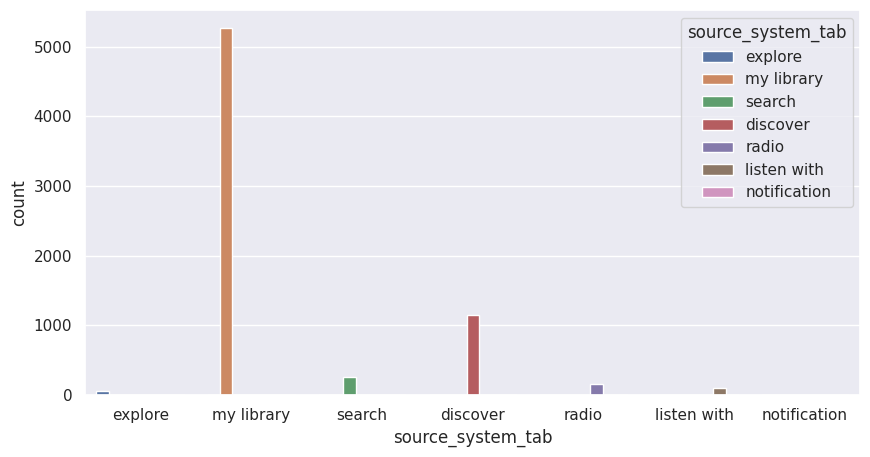

In [158]:
plt.figure(figsize=(10,5))
sns.countplot(x = train['source_system_tab'],hue=train['source_system_tab'])

<Axes: xlabel='source_system_tab', ylabel='count'>

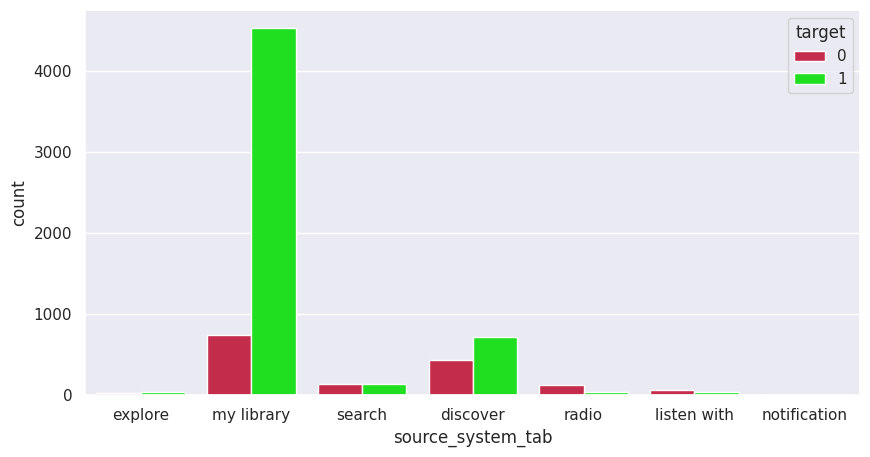

In [159]:
plt.figure(figsize=(10,5))
sns.countplot(x = train['source_system_tab'],palette=['crimson','lime'],hue=train['target'])

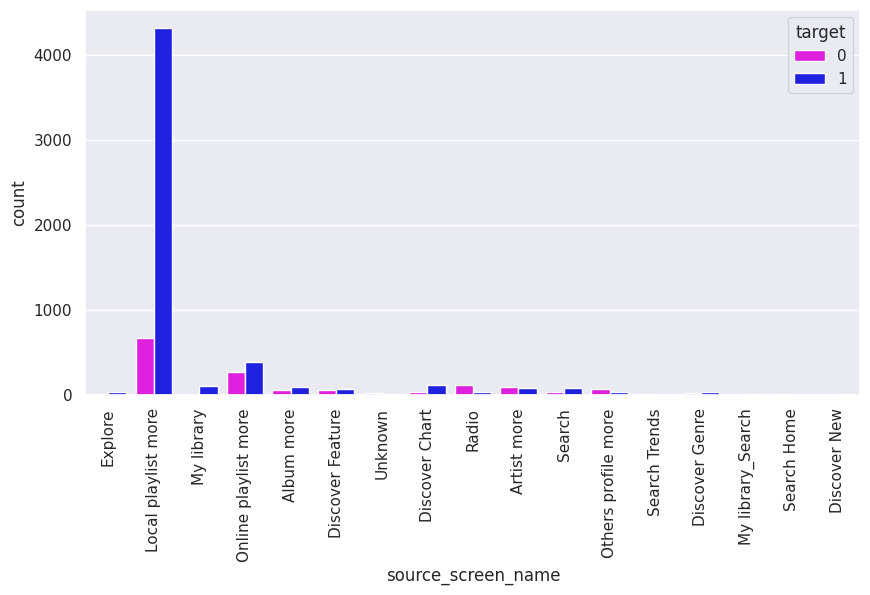

In [160]:
plt.figure(figsize=(10,5))
sns.countplot(x = train['source_screen_name'],palette=['magenta','blue'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

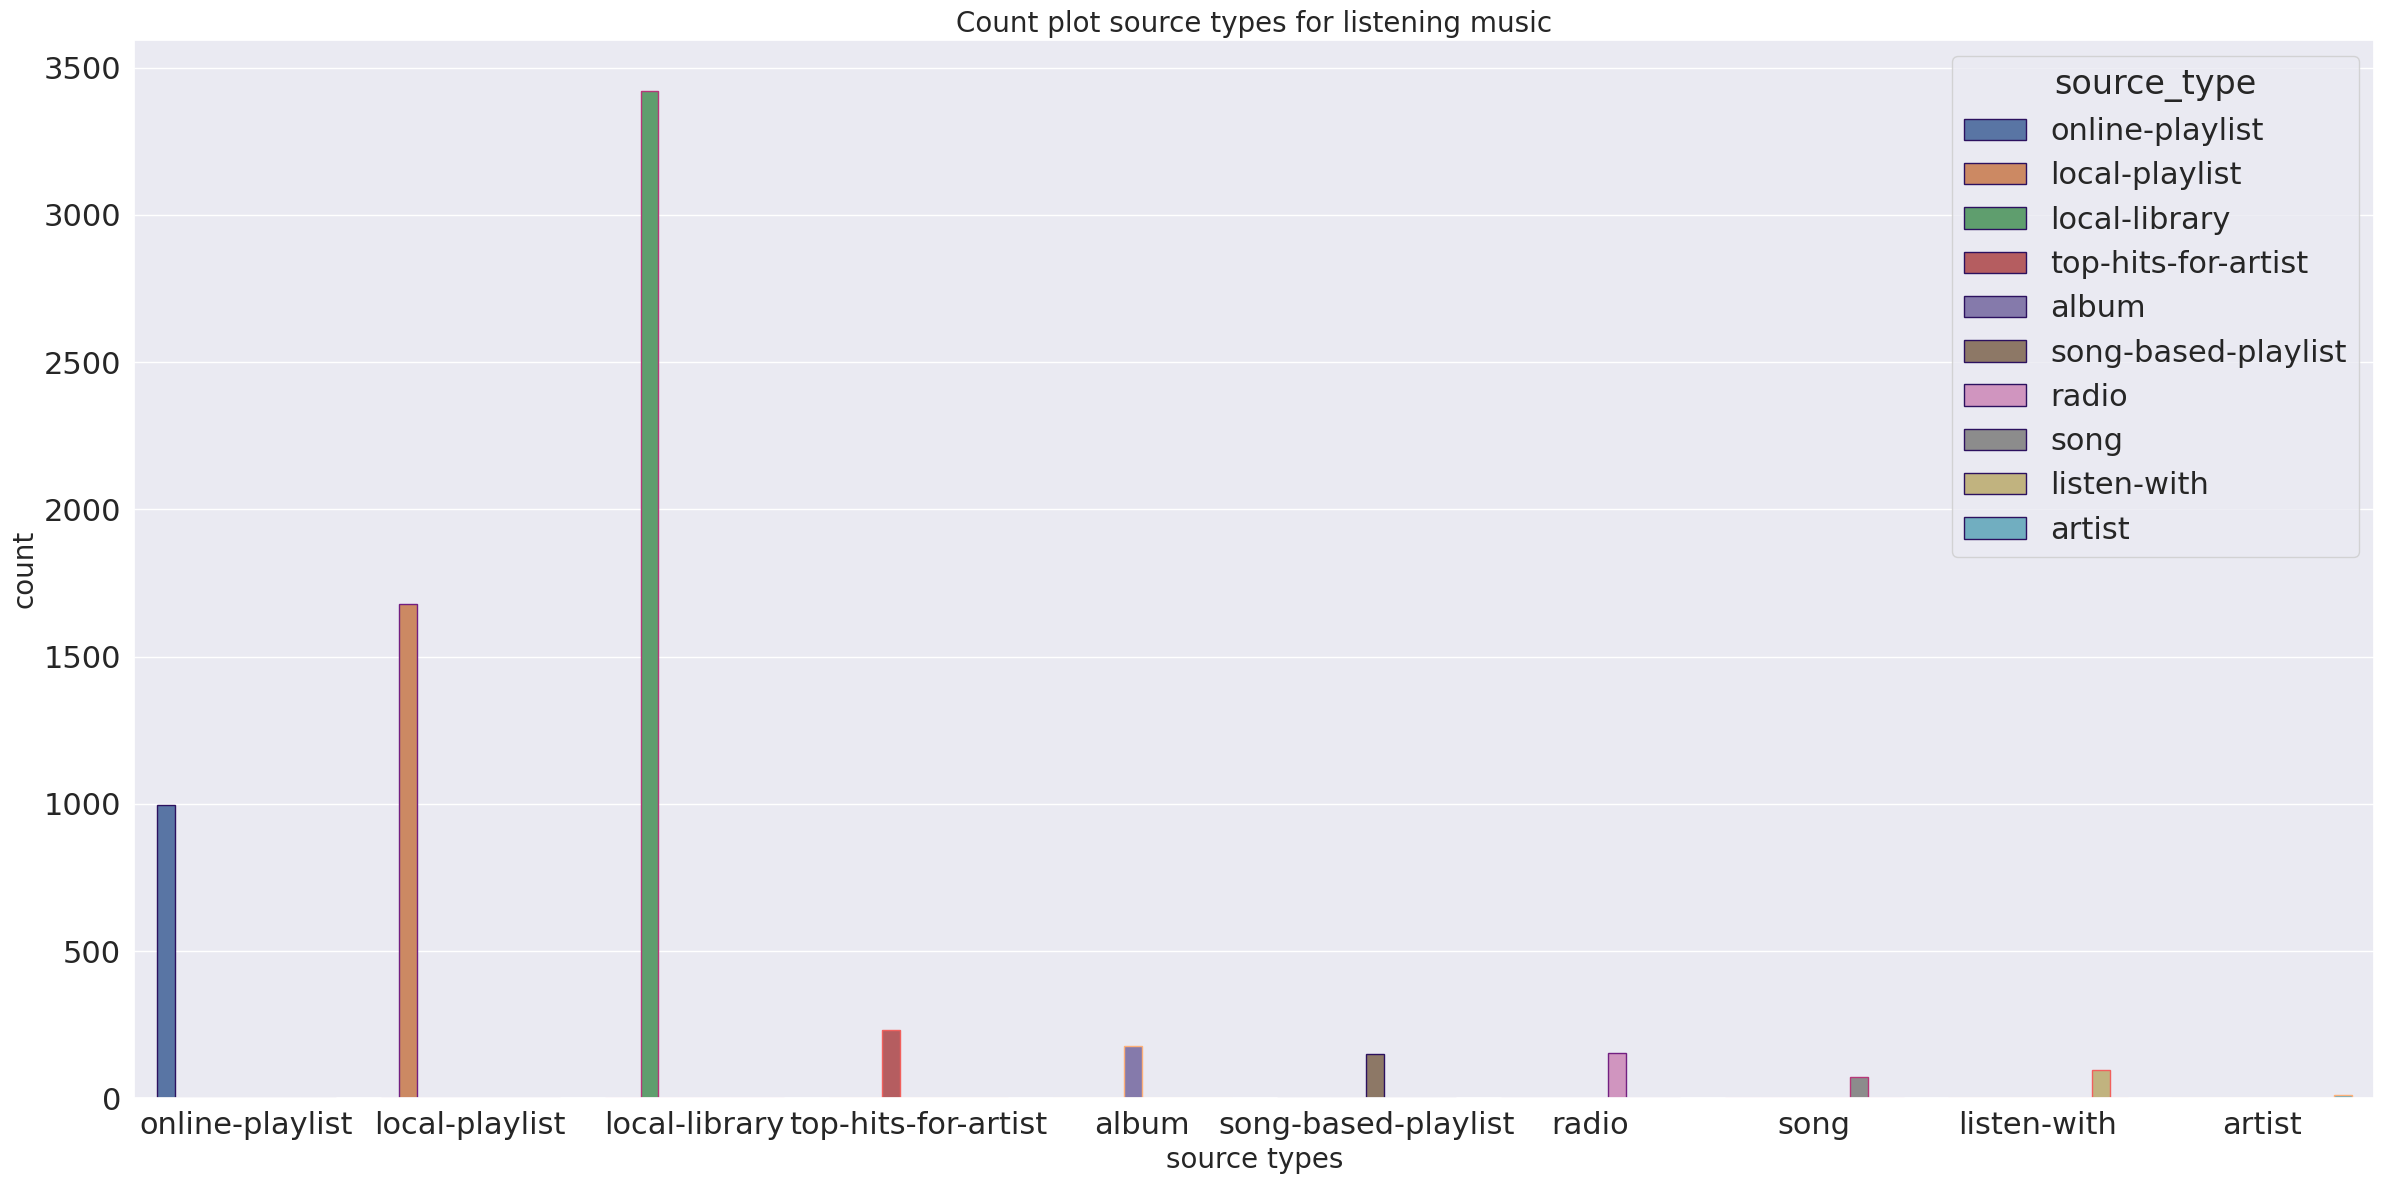

In [161]:
plt.figure(figsize=(24,12))
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='source_type',data=train,edgecolor=sns.color_palette('magma',5))
sns.set(style="ticks")
plt.xlabel('source types',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.xticks(rotation='horizontal')
plt.title('Count plot source types for listening music',fontsize=20)
plt.tight_layout()

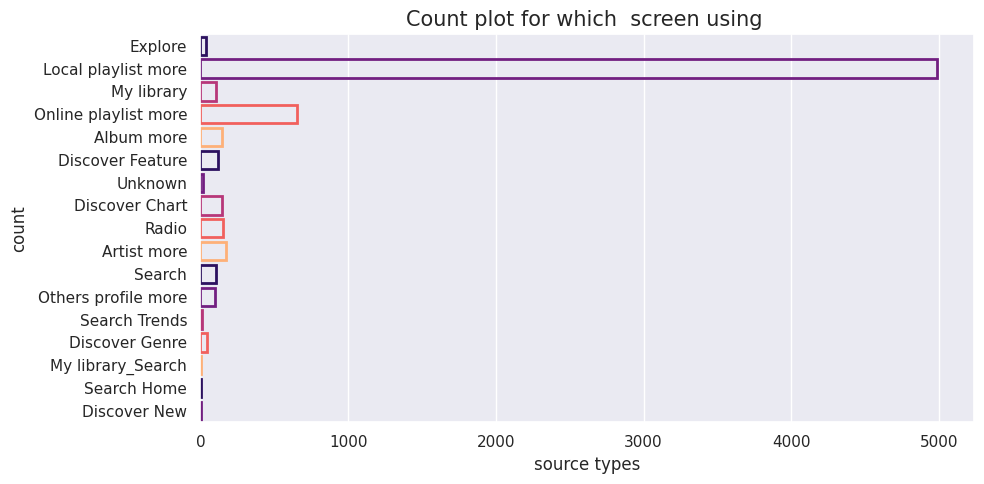

In [162]:
plt.figure(figsize=(10,5))
sns.set(font_scale=1)
sns.countplot(y='source_screen_name',data=train,facecolor=(0,0,0,0),linewidth=2,edgecolor=sns.color_palette('magma',5))
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=12)
plt.ylabel('count',fontsize=12)
plt.xticks(rotation='horizontal')
plt.title('Count plot for which  screen using ',fontsize=15)
plt.tight_layout()

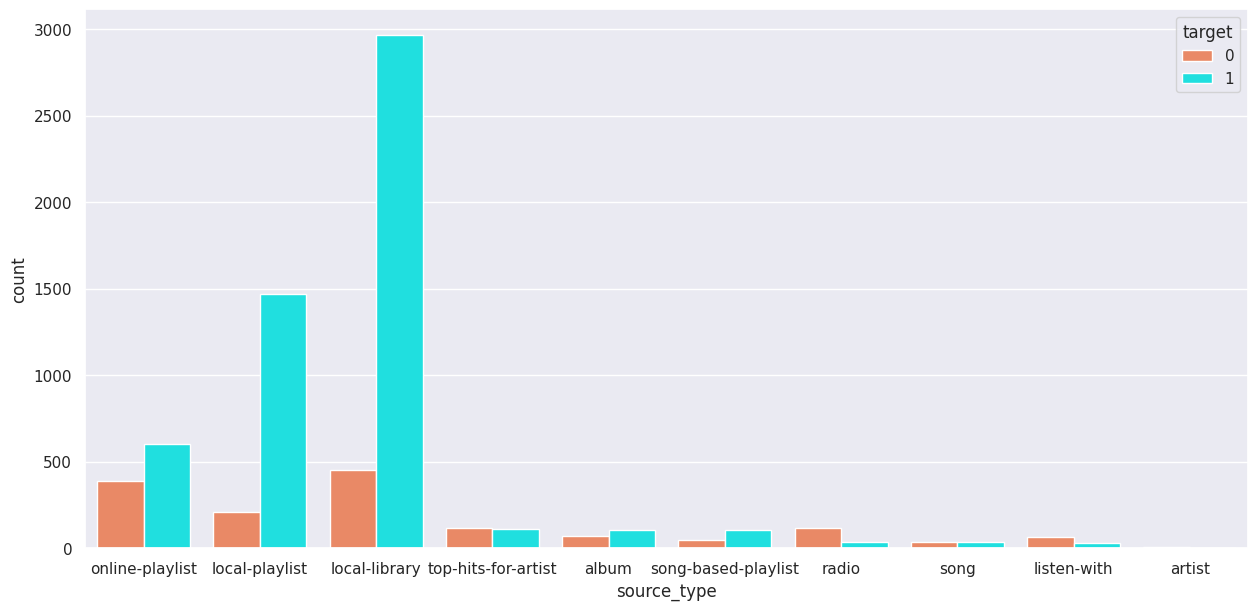

In [163]:
plt.figure(figsize=(15,7))
sns.countplot(x = train['source_type'],palette=['coral','cyan'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation = 'horizontal')
plt.show()

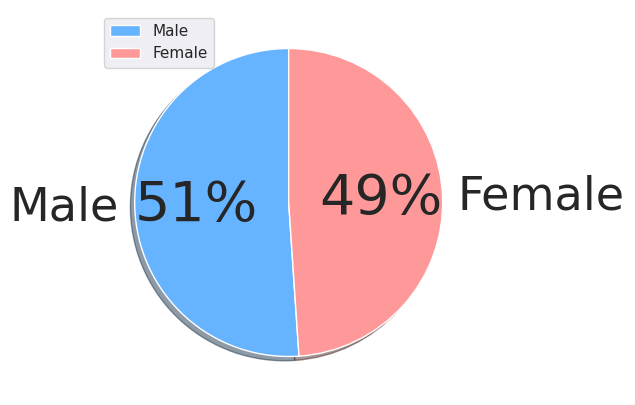

In [164]:
plt.rcParams['font.size'] = 40.0
labels = ['Male','Female']
colors = ['#66b3ff','#ff9999']
plt.figure(figsize = (5, 5))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes, labels=labels,colors=colors, autopct='%.0f%%', shadow=True, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()

<Axes: xlabel='language', ylabel='count'>

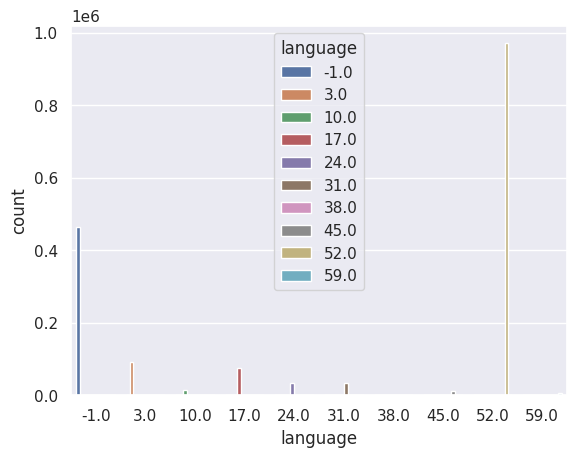

In [165]:
sns.countplot(x = songs['language'],data =train,hue=songs['language'],orient='v')

In [166]:
members_cols = members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')

In [167]:
train = train.fillna(-1)
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,artist_name,genre_ids,song_length,language,city,bd,gender,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,Bastille,359,206471.0,52.0,1,0,-1,7,5,2012,1,2,2017,10
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,Various Artists,1259,284584.0,52.0,13,24,female,9,11,2011,5,25,2017,9
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,Nas,1259,225396.0,52.0,13,24,female,9,11,2011,5,25,2017,9
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,Soundway,1019,255512.0,-1.0,13,24,female,9,11,2011,5,25,2017,9
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,Brett Young,1011,187802.0,52.0,1,0,-1,7,5,2012,1,2,2017,10


In [168]:
test = test.fillna(-1)
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type,artist_name,genre_ids,song_length,language,city,bd,gender,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,0,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,gpioqmDgSWfpkkCSQts5GMAGaM1TFH5zpVawYOjxIog=,my library,Local playlist more,local-library,謝和弦 (R-chord),465,268120.0,3.0,12,35,female,9,10,2014,2,9,2017,9
1,1,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,CQ8ouYUSxeEMbNaql4pAL35CqqJKgd0Ms7tH3DmHOJ8=,my library,Local playlist more,local-library,謝和弦 (R-chord),465,265926.0,3.0,12,35,female,9,10,2014,2,9,2017,9
2,2,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,NA/ZT/ard6XUWrnCvqbEnQLiXnYyP2m4Zq3jWvjLCPY=,my library,Local playlist more,local-library,王菀之 (Ivana Wong),458,217896.0,3.0,12,35,female,9,10,2014,2,9,2017,9
3,3,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,wloUHWvwV3EYBJsb0hUG1tIeRlgkrf8QzkootXtY/v0=,search,Online playlist more,online-playlist,Thomas Newman,921,197926.0,52.0,1,0,-1,7,17,2016,8,18,2017,9
4,4,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,UZ75pCG2butQs9dVI1s4tedeDZGRwQ551HGdRsVm29Y=,search,Online playlist more,online-playlist,Marcelo Zarvos,921,110759.0,52.0,1,0,-1,7,17,2016,8,18,2017,9


In [169]:
import gc
del members, songs; gc.collect();

In [170]:
cols = list(train.columns)
cols.remove('target')

In [171]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,artist_name,genre_ids,song_length,language,city,bd,gender,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,Bastille,359,206471.0,52.0,1,0,-1,7,5,2012,1,2,2017,10
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,Various Artists,1259,284584.0,52.0,13,24,female,9,11,2011,5,25,2017,9
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,Nas,1259,225396.0,52.0,13,24,female,9,11,2011,5,25,2017,9
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,Soundway,1019,255512.0,-1.0,13,24,female,9,11,2011,5,25,2017,9
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,Brett Young,1011,187802.0,52.0,1,0,-1,7,5,2012,1,2,2017,10


In [172]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type,artist_name,genre_ids,song_length,language,city,bd,gender,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,0,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,gpioqmDgSWfpkkCSQts5GMAGaM1TFH5zpVawYOjxIog=,my library,Local playlist more,local-library,謝和弦 (R-chord),465,268120.0,3.0,12,35,female,9,10,2014,2,9,2017,9
1,1,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,CQ8ouYUSxeEMbNaql4pAL35CqqJKgd0Ms7tH3DmHOJ8=,my library,Local playlist more,local-library,謝和弦 (R-chord),465,265926.0,3.0,12,35,female,9,10,2014,2,9,2017,9
2,2,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,NA/ZT/ard6XUWrnCvqbEnQLiXnYyP2m4Zq3jWvjLCPY=,my library,Local playlist more,local-library,王菀之 (Ivana Wong),458,217896.0,3.0,12,35,female,9,10,2014,2,9,2017,9
3,3,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,wloUHWvwV3EYBJsb0hUG1tIeRlgkrf8QzkootXtY/v0=,search,Online playlist more,online-playlist,Thomas Newman,921,197926.0,52.0,1,0,-1,7,17,2016,8,18,2017,9
4,4,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,UZ75pCG2butQs9dVI1s4tedeDZGRwQ551HGdRsVm29Y=,search,Online playlist more,online-playlist,Marcelo Zarvos,921,110759.0,52.0,1,0,-1,7,17,2016,8,18,2017,9


In [173]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for col in tqdm(cols):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|██████████| 19/19 [00:00<00:00, 81.94it/s]


In [174]:
unique_songs = range(max(train['song_id'].max(), test['song_id'].max()))
song_popularity = pd.DataFrame({'song_id': unique_songs, 'popularity':0})

train_sorted = train.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted = test.sort_values('song_id')
test_sorted.reset_index(drop=True, inplace=True)

In [175]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values

del train, test; gc.collect();

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state = 12)

del X, y; gc.collect();

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid)

watchlist = [d_train, d_valid]

In [176]:
print('Training LGBM model')

params = {}

params['learning_rate'] = 0.4
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'

model = lgb.train(params, train_set=d_train, num_boost_round=200, valid_sets=watchlist)

Training LGBM model
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

In [177]:
print('Making predictions and saving them')
p_test = model.predict(X_test)
p_test

Making predictions and saving them


array([0.99999821, 0.99999993, 0.99785019, ..., 0.47484792, 0.99982579,
       0.99652843])

In [178]:
yhat = (p_test>0.5).astype(int)
comp = (yhat==ytr).astype(int)
acc = comp.sum()/comp.size*100
print('The accuracy of lgbm model on test data is: {0:f}%'.format(acc))

The accuracy of lgbm model on test data is: 78.166667%
